<a href="https://colab.research.google.com/github/JedWojtowicz/MAD_jw/blob/main/JW_lab_06_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
DATAPATH = 'https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_06/data/zamowienia.csv'
df_zamowienia = pd.read_csv((DATAPATH), sep=';')

**Zadanie 1**

Dla zbioru danych `zamowienia.csv` wykonaj:
* 1.1 Wczytaj dane i sprawdź czy są w nim jakieś wartości brakujące.
* 1.2 W kolumnie `Sprzedawca` zastąp losowo 10% wartości wartością 'BRAK'. (zobacz funkje pseudolosowe w bibliotece pandas lub numpy oraz wykorzystaj ćwiczenia z zajęć poprzednich z indeksowanie danych w ramkach/seriach)
* 1.3 W kolumnie `idZamowienia` zastąp 5% wartości wartością `np.nan`.
* 1.4 W kolumnie `Data zamówienia` zastąp 20% wartości wartością `np.nan`.
* 1.5 W kolumnie `Utarg` zastąp 15% wartości wartością `np.nan`.
* 1.6 Zbiór z wartościami brakującymi zapisz w oddzielnej zmiennej.

In [150]:
#1.1
df_zamowienia.isnull().sum()
df_nulls = df_zamowienia.copy()

In [151]:
#1.2
df_nulls['Sprzedawca'] = df_zamowienia['Sprzedawca'].sample(frac=0.90)
print(df_nulls.isnull().sum())
df_nulls.fillna('BRAK', inplace=True)
print(df_nulls.isnull().sum())

Kraj                0
Sprzedawca         80
Data zamowienia     0
idZamowienia        0
Utarg               0
dtype: int64
Kraj               0
Sprzedawca         0
Data zamowienia    0
idZamowienia       0
Utarg              0
dtype: int64


In [152]:
#1.3
df_nulls['idZamowienia'] = df_zamowienia['idZamowienia'].sample(frac=0.95)
print(df_nulls.isnull().sum())

Kraj                0
Sprzedawca          0
Data zamowienia     0
idZamowienia       40
Utarg               0
dtype: int64


In [153]:
#1.4
df_nulls['Data zamowienia'] = df_zamowienia['Data zamowienia'].sample(frac=0.80)
print(df_nulls.isnull().sum())

Kraj                 0
Sprzedawca           0
Data zamowienia    160
idZamowienia        40
Utarg                0
dtype: int64


In [154]:
#1.5
df_nulls['Utarg'] = df_zamowienia['Utarg'].sample(frac=0.85)
print(df_nulls.isnull().sum())

Kraj                 0
Sprzedawca           0
Data zamowienia    160
idZamowienia        40
Utarg              120
dtype: int64


In [155]:
#1.6
df_nulls

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Kowalski,2003-07-16,10248.0,440.00
1,Polska,Sowiński,2003-07-10,10249.0,1863.40
2,Niemcy,Peacock,2003-07-12,10250.0,NaN
3,Niemcy,Leverling,2003-07-15,10251.0,654.06
4,Niemcy,Peacock,2003-07-11,10252.0,NaN
...,...,...,...,...,...
794,Polska,King,2005-04-30,11048.0,525.00
795,Niemcy,Leverling,2005-05-01,11052.0,1332.00
796,Niemcy,Fuller,2005-04-29,11053.0,3055.00
797,Niemcy,Callahan,2005-05-01,11056.0,3740.00


**Zadanie 2**

Dla nowego zbioru (z wartościami brakującymi) z zadania 1 wykonaj:
* 2.1 Zastąp wartości brakujące w kolumnie `idZamowienia` wartością 0.
* 2.2 Zastąp wartości brakujące w kolumnie `Data zamówienia` wartościami w przód (ffill()).
* 2.3 Zastąp wartości brakujące w kolumnie `Utarg` wartością średnią dla danego kraju.

In [156]:
#2.1
df_nulls['idZamowienia'] = df_nulls['idZamowienia'].fillna(0)
print(df_nulls.isnull().sum())

Kraj                 0
Sprzedawca           0
Data zamowienia    160
idZamowienia         0
Utarg              120
dtype: int64


In [157]:
#2.2
df_nulls['Data zamowienia'].ffill(inplace = True)
print(df_nulls.isnull().sum())

Kraj                 0
Sprzedawca           0
Data zamowienia      0
idZamowienia         0
Utarg              120
dtype: int64


<ipython-input-157-c1e7f781ba0e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nulls['Data zamowienia'].ffill(inplace = True)


In [158]:
#2.3
df_nulls['Utarg'] = df_nulls.groupby('Kraj')['Utarg'].fillna(df_nulls['Utarg'].mean())
print(df_nulls.isnull().sum())
df_nulls

Kraj               0
Sprzedawca         0
Data zamowienia    0
idZamowienia       0
Utarg              0
dtype: int64


<ipython-input-158-9cc5e5323501>:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_nulls['Utarg'] = df_nulls.groupby('Kraj')['Utarg'].fillna(df_nulls['Utarg'].mean())


,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Kowalski,2003-07-16,10248.0,440.000000
1,Polska,Sowiński,2003-07-10,10249.0,1863.400000
2,Niemcy,Peacock,2003-07-12,10250.0,1514.645317
3,Niemcy,Leverling,2003-07-15,10251.0,654.060000
4,Niemcy,Peacock,2003-07-11,10252.0,1514.645317
...,...,...,...,...,...
794,Polska,King,2005-04-30,11048.0,525.000000
795,Niemcy,Leverling,2005-05-01,11052.0,1332.000000
796,Niemcy,Fuller,2005-04-29,11053.0,3055.000000
797,Niemcy,Callahan,2005-05-01,11056.0,3740.000000


**Zadanie 3**

Wyświetl na wykresach typu histogram wraz z funkcją rozkładu (dokładnie tak jak w przykładach powyżej) rozkłady cechy `Utarg` dla zbioru oryginalnego oraz tego po wykonaniu poleceń z zadania 2.

In [159]:
def compare(df_1, df_2, feature, bins=10):
      df_1[feature].hist(bins=bins, figsize=(6, 4), alpha=0.3, density=True, color='g')
      df_1[feature].plot.density(color='g')
      df_2[feature].hist(bins=bins, figsize=(6, 4), alpha=0.3, density=True, color='r')
      df_2[feature].plot.density(color='r')
      plt.title(feature)
      plt.show()

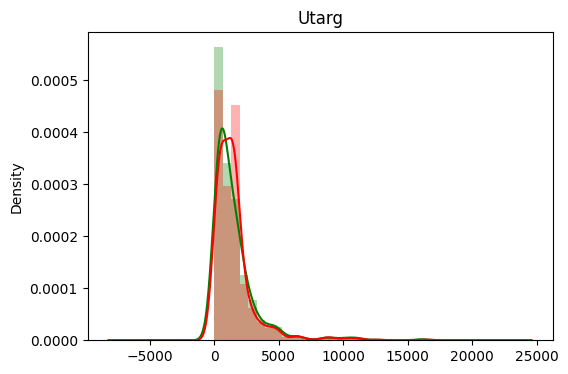

In [160]:
compare(df_zamowienia, df_nulls, 'Utarg', 25)

**Zadanie 4**  

Bazując na przykładach z punktu 2 na zbiorze `zamowienia.csv` policz:

* 4.1 Średnią wartość zamówienia dla każdego kraju.
* 4.2 Średnią wartość zamówienia dla każdego roku, a następnie miesiąca (grupowanie dwustopniowe).\
* 4.3 Liczbę zamówień, którą złożył każdy sprzedawca w danym roku.
* 4.4 Nazwę sprzedawcy z każdego kraju, którego sumaryczny utarg był najwyższy.
* 4.5 Sumę utargu w każdym kwartale (uwzględnij również rok), i posortuj od wartości najwyższych.

In [161]:
#4.1
df_zamowienia.groupby(['Kraj']).agg({'Utarg': 'mean'})

,Utarg
Kraj,
Niemcy,1532.528236
Polska,1550.376326


In [162]:
#4.2
df_zamowienia_lata = df_zamowienia.copy()
df_zamowienia_lata['Rok'] = pd.DatetimeIndex(df_zamowienia['Data zamowienia']).year
df_zamowienia_lata['Miesiac'] = pd.DatetimeIndex(df_zamowienia['Data zamowienia']).month
df_zamowienia_lata.groupby(['Rok', 'Miesiac']).agg({'Utarg': 'mean'})

Utarg
Rok  Miesiac             
2003 7        1218.251176
     8        1097.598696
     9         858.577143
     10       1456.390000
     11       1973.045000
     12       1443.086875
2004 1        1914.425000
     2        1164.535926
     3        1484.822187
     4        1053.214667
     5        1999.229687
     6        1669.432667
     7        1211.127097
     8        1562.998889
     9        1329.139737
     10       2064.032778
     11       1123.419722
     12       1632.980000
2005 1        1487.635357
     2        2132.384815
     3        1157.157910
     4        1931.107297
     5        1155.370000

In [164]:
#4.3
df_zamowienia_lata.groupby(['Sprzedawca', 'Rok']).agg({'Utarg': 'count'})

Utarg
Sprzedawca Rok        
Callahan   2003     17
           2004     55
           2005     27
Davolio    2003     23
           2004     56
           2005     38
Dudek      2003      5
           2004     18
           2005     18
Fuller     2003     14
           2004     41
           2005     37
King       2003     11
           2004     34
           2005     22
Kowalski   2003     10
           2004     19
           2005     13
Leverling  2003     18
           2004     67
           2005     40
Peacock    2003     31
           2004     78
           2005     42
Sowiński   2003     14
           2004     31
           2005     20

In [194]:
#4.4
df_zamowienia_grouped = df_zamowienia.groupby(['Kraj', 'Sprzedawca'])
df_zamowienia_grouped.agg({'Utarg': 'sum'}).sort_values('Utarg')

Utarg
Kraj   Sprzedawca           
Polska Kowalski     68792.25
       Sowiński     72527.63
       Dudek        75048.04
       King        116962.99
Niemcy Callahan    123032.67
       Fuller      162503.78
       Davolio     182500.09
       Leverling   201196.27
       Peacock     225763.68

In [190]:
#4.5
df_zamowienia_kwartalne = df_zamowienia_lata.copy()
df_zamowienia_kwartalne['Kwartal'] = pd.DatetimeIndex(df_zamowienia['Data zamowienia']).quarter
df_zamowienia_kwartalne.groupby(['Rok', 'Kwartal']).agg({'Utarg': 'sum'}).sort_values('Utarg', ascending=False)

Utarg
Rok  Kwartal           
2005 1        275985.94
2004 4        175168.55
2005 2        149834.16
2004 2        145654.77
     3        144320.21
     1        144047.23
2003 4        129331.38
     3         63985.16